In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq.job import job_monitor
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-07-20 02:46:19,439: Credentials are already in use. The existing account in the session will be replaced.


# 回路の生成
あまり良い方法も思いつかなかったので、x, y, z それぞれを測定する回路を作りました。

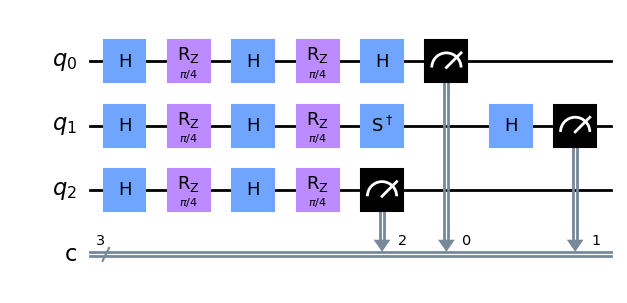

In [13]:
#初期状態
circ_init = QuantumCircuit(1,1)

#量子回路
circ = QuantumCircuit(3, 3)




#測定したい量子状態を作る
for i in range(3):
    circ.h(i)
    circ.rz(np.pi/4,i)
    circ.h(i)
    circ.rz(np.pi/4,i)

# x,y,z 測定部をそれぞれ作る
circ.h(0)
circ.measure([0],[0])

circ.sdg(1)
circ.h(1)
circ.measure([1],[1])

circ.measure([2],[2])



#回路を表示
circ.draw(output='mpl')

# シミュレータで実行

z期待値を計算しやすいように関数にしておきます。

In [14]:
def expect_value(data_list, n):
    count = 0

    for key, value in data_list.items():
        if key[n] == '0':
            count += value
        elif key[n] == '1':
            count -= value
    return count

In [23]:
#シミュレータで試す
simulator = Aer.get_backend('qasm_simulator')

#ショット数、回路の配列、結果の格納庫を用意
shots = 8192
results_sim = []

#回路をシミュレート
job_sim = simulator.run(transpile(circ, backend=simulator), shots=shots)
counts_sim = job_sim.result().get_counts(circ)


#結果から各座標の期待値を計算
ntotal = sum(counts_sim.values())
x = expect_value(counts_sim,2)/ntotal
y = expect_value(counts_sim,1)/ntotal
z = expect_value(counts_sim,0)/ntotal

# 座標 (x,y,z) を表示する
print([x,y,z])

[0.489990234375, -0.497314453125, 0.70654296875]


# 実機で実行

In [17]:
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider(instance='ibm-q-utokyo/internal/adv-sci-1a-2023s')

#使用可能なコンピュータを調べる
print("Available backends:")
back=provider.backends()

for i in back:
    print(i)


Available backends:
<IBMBackend('ibm_nazca')>
<IBMBackend('ibm_auckland')>
<IBMBackend('ibm_brisbane')>
<IBMBackend('ibm_hanoi')>
<IBMBackend('ibmq_belem')>
<IBMBackend('ibmq_kolkata')>
<IBMBackend('ibmq_lima')>
<IBMBackend('ibm_cairo')>
<IBMBackend('ibm_kawasaki')>
<IBMBackend('ibmq_guadalupe')>
<IBMBackend('ibmq_qasm_simulator')>
<IBMBackend('simulator_mps')>
<IBMBackend('ibm_algiers')>
<IBMBackend('simulator_extended_stabilizer')>
<IBMBackend('simulator_stabilizer')>
<IBMBackend('ibm_nairobi')>
<IBMBackend('ibm_sherbrooke')>
<IBMBackend('ibmq_jakarta')>
<IBMBackend('ibmq_manila')>
<IBMBackend('ibmq_mumbai')>
<IBMBackend('ibmq_quito')>
<IBMBackend('ibm_lagos')>
<IBMBackend('ibm_perth')>
<IBMBackend('simulator_statevector')>


In [18]:
device=back[3]
print("using backend is " + str(device))

using backend is <IBMBackend('ibm_hanoi')>


In [20]:
#実際のデバイスで計算
#ショット数、回路の配列、結果の格納庫を用意
shots = 2048


#回路を実行
job_exp = execute(circ, backend=device, shots=shots)
job_monitor(job_exp)
counts_exp = job_exp.result().get_counts(circ)

Job Status: job has successfully run


In [21]:
#結果から各座標の期待値を計算
ntotal = sum(counts_exp.values())
x = expect_value(counts_exp,2)/ntotal
y = expect_value(counts_exp,1)/ntotal
z = expect_value(counts_exp,0)/ntotal

# 座標 (x,y,z) を表示する
print([x,y,z])

[0.4794921875, -0.421875, 0.6748046875]


# アダマールテストを利用する
